from sklearn

In [12]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()

irisDF = pd.DataFrame(data = iris.data, columns=iris.feature_names)

kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter=300, random_state=0).fit(irisDF)

irisDF['cluster'] = kmeans.labels_

print(irisDF.shape)
irisDF.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
iris.target

In [11]:
score_sample = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples( ) returns shape', score_sample)

irisDF['silhouette_coeff'] = score_sample

average_score = silhouette_score(iris.data, irisDF['cluster'])
print(f'iris silhouette Analysis Score : {average_score : .3f}')

irisDF.head(15)

silhouette_samples( ) returns shape [0.85295506 0.81549476 0.8293151  0.80501395 0.8493016  0.74828037
 0.82165093 0.85390505 0.75215011 0.825294   0.80310303 0.83591262
 0.81056389 0.74615046 0.70259371 0.64377156 0.77568391 0.85101831
 0.70685782 0.82030124 0.78418399 0.82590584 0.79297218 0.7941134
 0.77503635 0.79865509 0.83346695 0.84201773 0.84364429 0.81784646
 0.81518962 0.79899235 0.76272528 0.72224615 0.82877171 0.83224831
 0.79415322 0.84188954 0.76856774 0.85033231 0.84941579 0.63900017
 0.78657771 0.80023815 0.74698726 0.80977534 0.81340268 0.81902059
 0.8182324  0.85209835 0.02672203 0.38118643 0.05340075 0.59294381
 0.36885321 0.59221025 0.28232583 0.26525405 0.34419223 0.57829491
 0.37478707 0.58710354 0.55107857 0.48216686 0.56310057 0.32459291
 0.55751057 0.61072967 0.46149897 0.6115753  0.32909528 0.58968904
 0.31046301 0.49424779 0.5000461  0.38548959 0.12629433 0.11798213
 0.55293611 0.5069822  0.59466094 0.5607585  0.61972579 0.26087292
 0.54077013 0.41598629 0.16

,0,1,2,3,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302
5,5.4,3.9,1.7,0.4,1,0.748280
6,4.6,3.4,1.4,0.3,1,0.821651
7,5.0,3.4,1.5,0.2,1,0.853905
8,4.4,2.9,1.4,0.2,1,0.752150
9,4.9,3.1,1.5,0.1,1,0.825294


<AxesSubplot:>

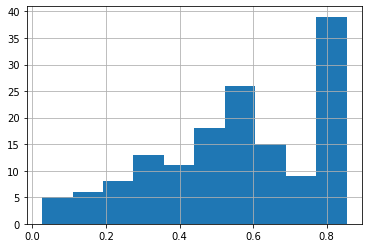

In [9]:
irisDF['silhouette_coeff'].hist()

In [ ]:
def visualize_silhouette(cluster_lists, X_features):
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score
    
    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    n_cols = len(cluster_lists)
    
    fig, axs = plt.subplots(figsize = (4*n_cols, 4), nrows=1, ncols=n_cols)
    
    for ind, n_cluster in enumerate(cluster_lists):
        
        clusterer = KMeans(n_clusters= n_cluster, max_iter=500, random_state=0)
        cluster_lables = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_lables)
        sil_values = silhouette_samples(X_features, cluster_lables)
        
        y_lower = 10
        acs[ind].set_title('Number of Cluster : ' + str(n_cluster) + '\n' \
                            'Silhouette score : ' + str)